In [ ]:
import os
import matplotlib.pyplot as plt
import random
import math
from PIL import Image
import PIL.Image
import shutil
import skimage
import numpy as np
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
srcRoot = "/content/gdrive/MyDrive/APS360 Project/Data/FinalDataset-Unbalanced"
destRoot =  "/content/gdrive/MyDrive/APS360 Project/Data/FinalDataset"

<BarContainer object of 60 artists>

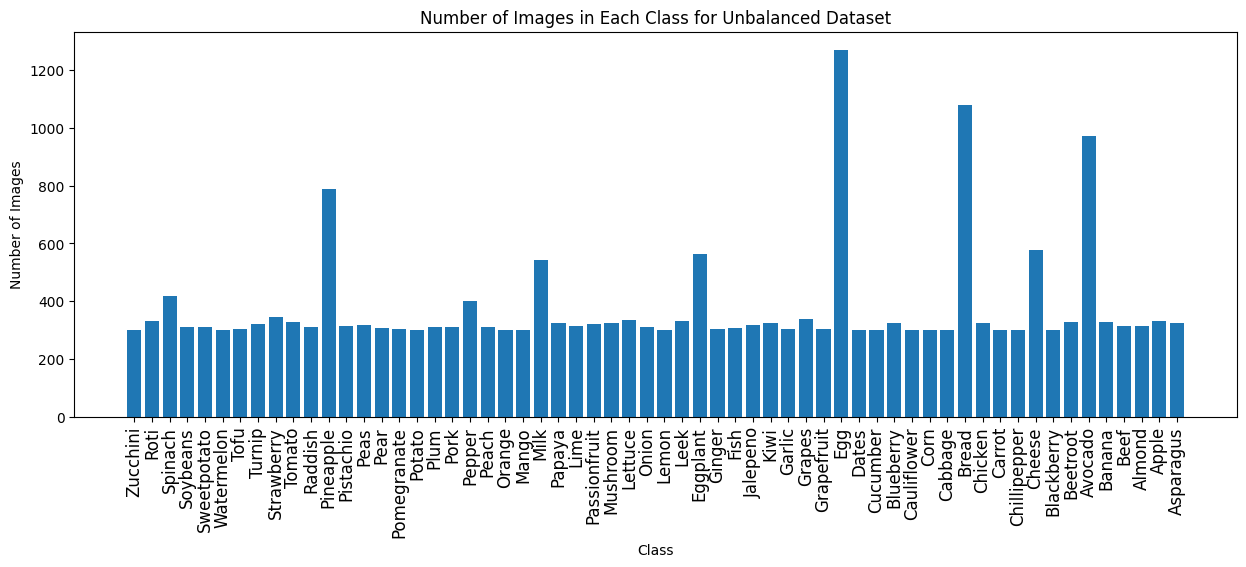

In [ ]:
initClassFolder = []
initClassName = []
initNumImages = []

for folder in os.scandir(srcRoot):
  initClassFolder.append(folder)
  initClassName.append(folder.name)
  initNumImages.append(len(os.listdir(folder.path)))

fig = plt.figure(figsize = (15,5))
plt.title("Number of Images in Each Class for Unbalanced Dataset")
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.bar(initClassName, initNumImages)


In [ ]:
if os.path.exists(destRoot):
  shutil.rmtree(destRoot)
  
shutil.copytree(srcRoot, destRoot)


'/content/gdrive/MyDrive/APS360 Project/Data/FinalDataset'

<BarContainer object of 60 artists>

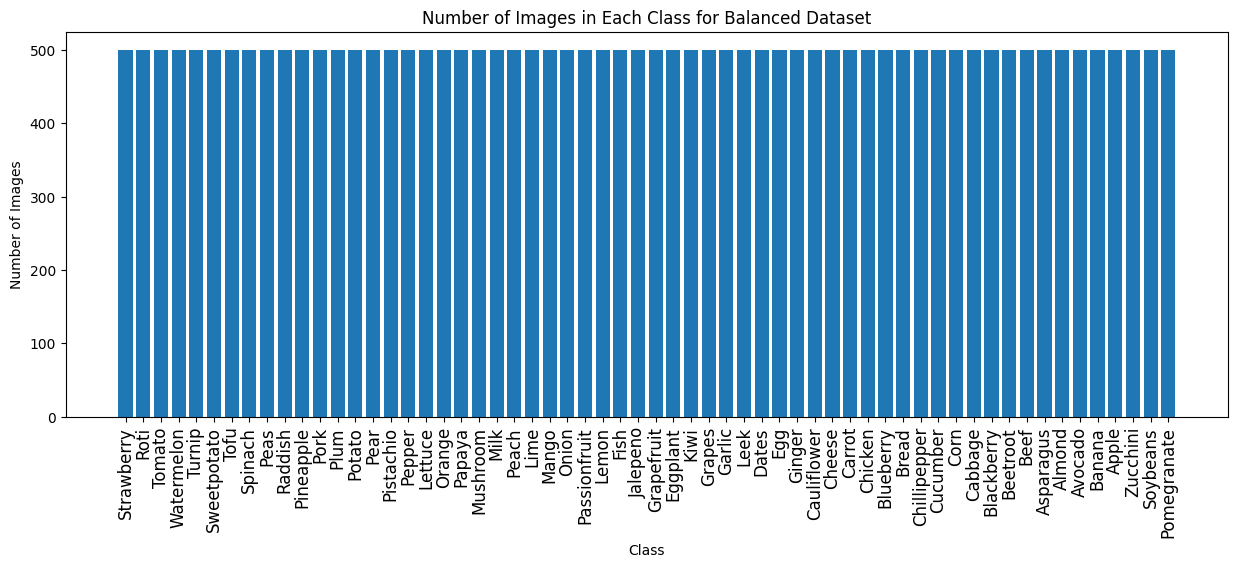

In [ ]:
classFolder = []
className = []
numImages = []
targetVal = 500

for folder in os.scandir(destRoot):
  classFolder.append(folder)
  className.append(folder.name)
  # numImages.append(len(os.listdir(folder.path)))

fig = plt.figure(figsize = (15,5))
plt.title("Number of Images in Each Class for Balanced Dataset")
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.bar(className, numImages)

In [ ]:
n = len(initNumImages)
for i in range(n):
  if initNumImages[n-i-1] < 500:
    print(initClassName[n-i-1],"-",initNumImages[n-i-1])
  else:
    print("Done:", initClassName[n-i-1],"-", initNumImages[n-i-1])

In [ ]:
#removing rgba images and replacing it with rgb copy
for i in range(len(classFolder)):
  for img in os.listdir(classFolder[i].path):
    openImg = PIL.Image.open(classFolder[i].path + "/" + img)
    folder_path = classFolder[i].path
    if openImg.mode != 'RGB':
      newImg = openImg.convert('RGB')
      newImg.save(r'rgb' + str(img) + '.jpg')
      shutil.move('/content/'+'rgb' + str(img) + '.jpg', folder_path)
      os.remove(classFolder[i].path + "/" + img)
    elif not img.endswith(".jpg"):
      openImg.save(r'change' + str(img)+ '.jpg')
      shutil.move('/content/'+'change' + str(img)+ '.jpg', folder_path)
      os.remove(classFolder[i].path + "/" + img)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:

for i in range(len(classFolder)):
  if numImages[i] > targetVal:
    for img in random.sample(os.listdir(classFolder[i].path), numImages[i] - targetVal):
      os.remove(classFolder[i].path + "/" + img)

  elif numImages[i] < targetVal:
   
    rotateCounter = 0
    hFlipCounter = 0
    vFlipCounter = 0
    noiseCounter = 0
    numGenerate = targetVal - numImages[i]

    while(numImages[i] != targetVal):
      for img in random.sample(os.listdir(classFolder[i].path), min((targetVal - numImages[i]), numImages[i])):
        openImg = PIL.Image.open(classFolder[i].path + "/" + img).convert('RGB')
        folder_path = classFolder[i].path

      #rotation
        if rotateCounter != math.floor(numGenerate * 0.25):
          rotateCounter += 1
          angle = random.randint(0, 180)
          newImg = openImg.rotate(angle = angle, expand = True, fillcolor = (255,255,255,0))
          newImg = newImg.resize((224, 224))
          randVal = random.uniform(0, 1000)
          newImg.save(r'newImg_' + str(className[i]) + 'rotated' + str(angle) + str(randVal) + '.jpg')
          shutil.move('/content/'+'newImg_' + str(className[i]) + 'rotated' + str(angle) + str(randVal)  + '.jpg', folder_path)

      #horizontal flip
        elif hFlipCounter != math.floor(numGenerate * 0.25):
          hFlipCounter += 1
          newImg = openImg.transpose(PIL.Image.FLIP_LEFT_RIGHT)
          randVal = random.uniform(0, 1000)
          newImg.save(r'newImg_' + str(className[i]) + 'hflip'+ str(randVal) + '.jpg')
          shutil.move('/content/'+'newImg_' + str(className[i]) + 'hflip'+ str(randVal) + '.jpg', folder_path)
          
      #vertical flip
        elif vFlipCounter != math.floor(numGenerate * 0.25):
          vFlipCounter += 1
          newImg = openImg.transpose(PIL.Image.FLIP_TOP_BOTTOM)
          randVal = random.uniform(0, 1000)
          newImg.save(r'newImg_' + str(className[i]) + 'vflip'+ str(randVal) + '.jpg')
          shutil.move('/content/'+'newImg_' + str(className[i]) + 'vflip'+ str(randVal) + '.jpg', folder_path)
       
      # #adding noise
        else:
          noiseCounter += 1
          readImg = skimage.io.imread(classFolder[i].path + "/" + img)
          mode = random.choice(["gaussian", "localvar", "poisson", "salt", "pepper", "s&p", "speckle"])
          newImg = skimage.util.random_noise(readImg, mode=mode)
          randVal = random.uniform(0, 1000)
          newImg = np.array(255 * newImg, dtype = 'uint8')
          newImg = Image.fromarray(newImg)
          newImg.save(r'newImg_' + str(className[i]) + 'noise'+ str(mode)+ str(randVal) + '.jpg')
          shutil.move('/content/'+'newImg_' + str(className[i]) + 'noise'+ str(mode)+ str(randVal) + '.jpg', folder_path)

        numImages[i] += 1

          

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
